In [ ]:
# 셀 1: 필요한 라이브러리 임포트
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 영어 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

print("TensorFlow version:", tf.__version__)
print("Libraries imported successfully!")

TensorFlow version: 2.19.0
Libraries imported successfully!


Reduced training data shape: (3000, 784)
This smaller dataset will make overfitting and underfitting more apparent!
Training data shape: (3000, 784)
Validation data shape: (9000, 784)
Test data shape: (10000, 784)
Input dimension: 784
Number of classes: 10


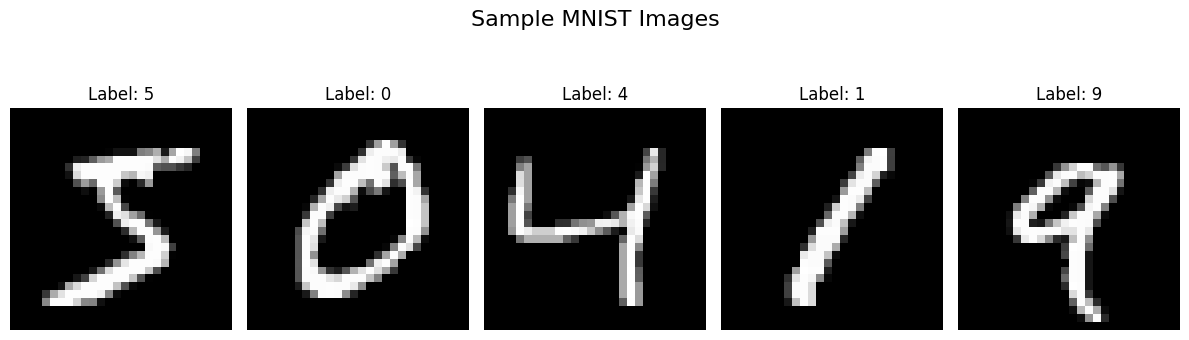

In [ ]:
# 셀 2: MNIST 데이터 로드 및 전처리
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()

# 데이터 정규화 (0-255 범위를 0-1로 변환)
x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 이미지 데이터를 1차원으로 변환 (28x28 -> 784)
x_train_full = x_train_full.reshape(x_train_full.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# 레이블을 원-핫 인코딩
y_train_full = keras.utils.to_categorical(y_train_full, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# 훈련 데이터를 훈련용과 검증용으로 분할
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.15, random_state=42
)

# 과적합/과소적합을 더 극명하게 보이기 위해 훈련 데이터 크기 축소
train_size = 3000  # 원래 51,000개에서 3,000개로 축소
x_train_small = x_train[:train_size]
y_train_small = y_train[:train_size]

print(f"Reduced training data shape: {x_train_small.shape}")
print("This smaller dataset will make overfitting and underfitting more apparent!")

print(f"Training data shape: {x_train_small.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Input dimension: {x_train_small.shape[1]}")
print(f"Number of classes: {y_train_small.shape[1]}")

# 샘플 이미지 시각화
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    # 원본 데이터에서 이미지 가져오기
    original_image = keras.datasets.mnist.load_data()[0][0][i]
    plt.imshow(original_image, cmap='gray')
    plt.title(f'Label: {keras.datasets.mnist.load_data()[0][1][i]}')
    plt.axis('off')
plt.suptitle('Sample MNIST Images', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# 셀 3: 모델 정의 함수들 (더 극단적으로 수정)
def create_normal_model():
    """정상 학습 모델 (Well-fitted Model)"""
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def create_overfitted_model():
    """과적합 모델 (Overfitted Model) - 더 극단적으로"""
    model = keras.Sequential([
        layers.Dense(1024, activation='relu', input_shape=(784,)),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),  # 높은 학습률
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def create_underfitted_model():
    """과소적합 모델 (Underfitted Model) - 더 극단적으로"""
    model = keras.Sequential([
        layers.Dense(4, activation='relu', input_shape=(784,)),  # 더 작게
        layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=0.01),  # 낮은 학습률
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

print("Updated model definition functions created!")
print("Models are now more extreme to show clearer differences.")

Updated model definition functions created!
Models are now more extreme to show clearer differences.


In [ ]:
# 셀 4: 모델 구조 시각화
models = {
    'Normal Model': create_normal_model(),
    'Overfitted Model': create_overfitted_model(),
    'Underfitted Model': create_underfitted_model()
}

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"{name} Architecture")
    print(f"{'='*50}")
    model.summary()

    # 파라미터 수 계산
    total_params = model.count_params()
    print(f"Total parameters: {total_params:,}")

print("\n" + "="*70)
print("MODEL ARCHITECTURE COMPARISON")
print("="*70)
print("Normal Model: Moderate depth with dropout for regularization")
print("Overfitted Model: Very deep with many parameters, no regularization")
print("Underfitted Model: Very shallow with few parameters")
print("="*70)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Normal Model Architecture


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Total parameters: 109,386

Overfitted Model Architecture


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,846,730 (7.04 MB)

 Trainable params: 1,846,730 (7.04 MB)

 Non-trainable params: 0 (0.00 B)

Total parameters: 1,846,730

Underfitted Model Architecture


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,190 (12.46 KB)

 Trainable params: 3,190 (12.46 KB)

 Non-trainable params: 0 (0.00 B)

Total parameters: 3,190

MODEL ARCHITECTURE COMPARISON
Normal Model: Moderate depth with dropout for regularization
Overfitted Model: Very deep with many parameters, no regularization
Underfitted Model: Very shallow with few parameters


In [ ]:
# 셀 5: 모델 학습 (수정된 버전)
def train_model(model, model_name, epochs=50):
    """모델 학습 함수"""
    print(f"\nTraining {model_name}...")

    # 콜백 설정
    callbacks = []
    if model_name == 'Normal Model':
        callbacks.append(
            keras.callbacks.EarlyStopping(
                monitor='val_accuracy',
                patience=15,
                restore_best_weights=True
            )
        )
    # 과적합 모델과 과소적합 모델은 조기종료 없음

    # 학습 (축소된 데이터셋 사용)
    history = model.fit(
        x_train_small, y_train_small,  # 축소된 데이터셋
        batch_size=64,  # 작은 배치 크기
        epochs=epochs,
        validation_data=(x_val, y_val),
        callbacks=callbacks,
        verbose=1
    )

    return history

# 모델들을 다시 생성
normal_model = create_normal_model()
overfitted_model = create_overfitted_model()
underfitted_model = create_underfitted_model()

# 각 모델 학습
histories = {}

# 정상 모델 학습
print("Starting Normal Model Training...")
histories['Normal'] = train_model(normal_model, 'Normal Model', epochs=100)

# 과적합 모델 학습 (많은 에포크, 작은 데이터)
print("Starting Overfitted Model Training...")
histories['Overfitted'] = train_model(overfitted_model, 'Overfitted Model', epochs=200)

# 과소적합 모델 학습 (적은 에포크)
print("Starting Underfitted Model Training...")
histories['Underfitted'] = train_model(underfitted_model, 'Underfitted Model', epochs=50)

print("\nAll models trained successfully!")
print("Note: Models trained on smaller dataset to emphasize overfitting/underfitting")

Starting Normal Model Training...

Training Normal Model...
Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.2771 - loss: 2.0389 - val_accuracy: 0.7994 - val_loss: 0.8405
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7202 - loss: 0.9030 - val_accuracy: 0.8520 - val_loss: 0.5198
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8020 - loss: 0.6192 - val_accuracy: 0.8821 - val_loss: 0.4052
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8649 - loss: 0.4625 - val_accuracy: 0.8957 - val_loss: 0.3550
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8743 - loss: 0.4077 - val_accuracy: 0.9062 - val_loss: 0.3164
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8857 - loss: 0.3797 - val_accuracy: 0.9054 - val_loss: 0.2997
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9158 - loss: 0.3062 - val_accuracy: 0.9124 - val_loss: 0.2849
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/s

In [ ]:
# 셀 6: 모델 성능 평가
models_eval = {
    'Normal Model': normal_model,
    'Overfitted Model': overfitted_model,
    'Underfitted Model': underfitted_model
}

print("="*70)
print("FINAL MODEL PERFORMANCE EVALUATION")
print("="*70)

results = {}

for name, model in models_eval.items():
    # 검증 데이터 평가
    val_loss, val_accuracy = model.evaluate(x_val, y_val, verbose=0)
    # 테스트 데이터 평가
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

    results[name] = {
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
        'val_loss': val_loss,
        'test_loss': test_loss
    }

    print(f"\n{name}:")
    print(f"  Validation Accuracy: {val_accuracy:.4f}")
    print(f"  Test Accuracy: {test_accuracy:.4f}")
    print(f"  Validation Loss: {val_loss:.4f}")
    print(f"  Test Loss: {test_loss:.4f}")
    print(f"  Generalization Gap: {val_accuracy - test_accuracy:.4f}")

print("\n" + "="*70)

FINAL MODEL PERFORMANCE EVALUATION

Normal Model:
  Validation Accuracy: 0.9373
  Test Accuracy: 0.9371
  Validation Loss: 0.3070
  Test Loss: 0.3082
  Generalization Gap: 0.0002

Overfitted Model:
  Validation Accuracy: 0.9430
  Test Accuracy: 0.9469
  Validation Loss: 0.8881
  Test Loss: 0.8307
  Generalization Gap: -0.0039

Underfitted Model:
  Validation Accuracy: 0.7740
  Test Accuracy: 0.7872
  Validation Loss: 0.8117
  Test Loss: 0.7674
  Generalization Gap: -0.0132



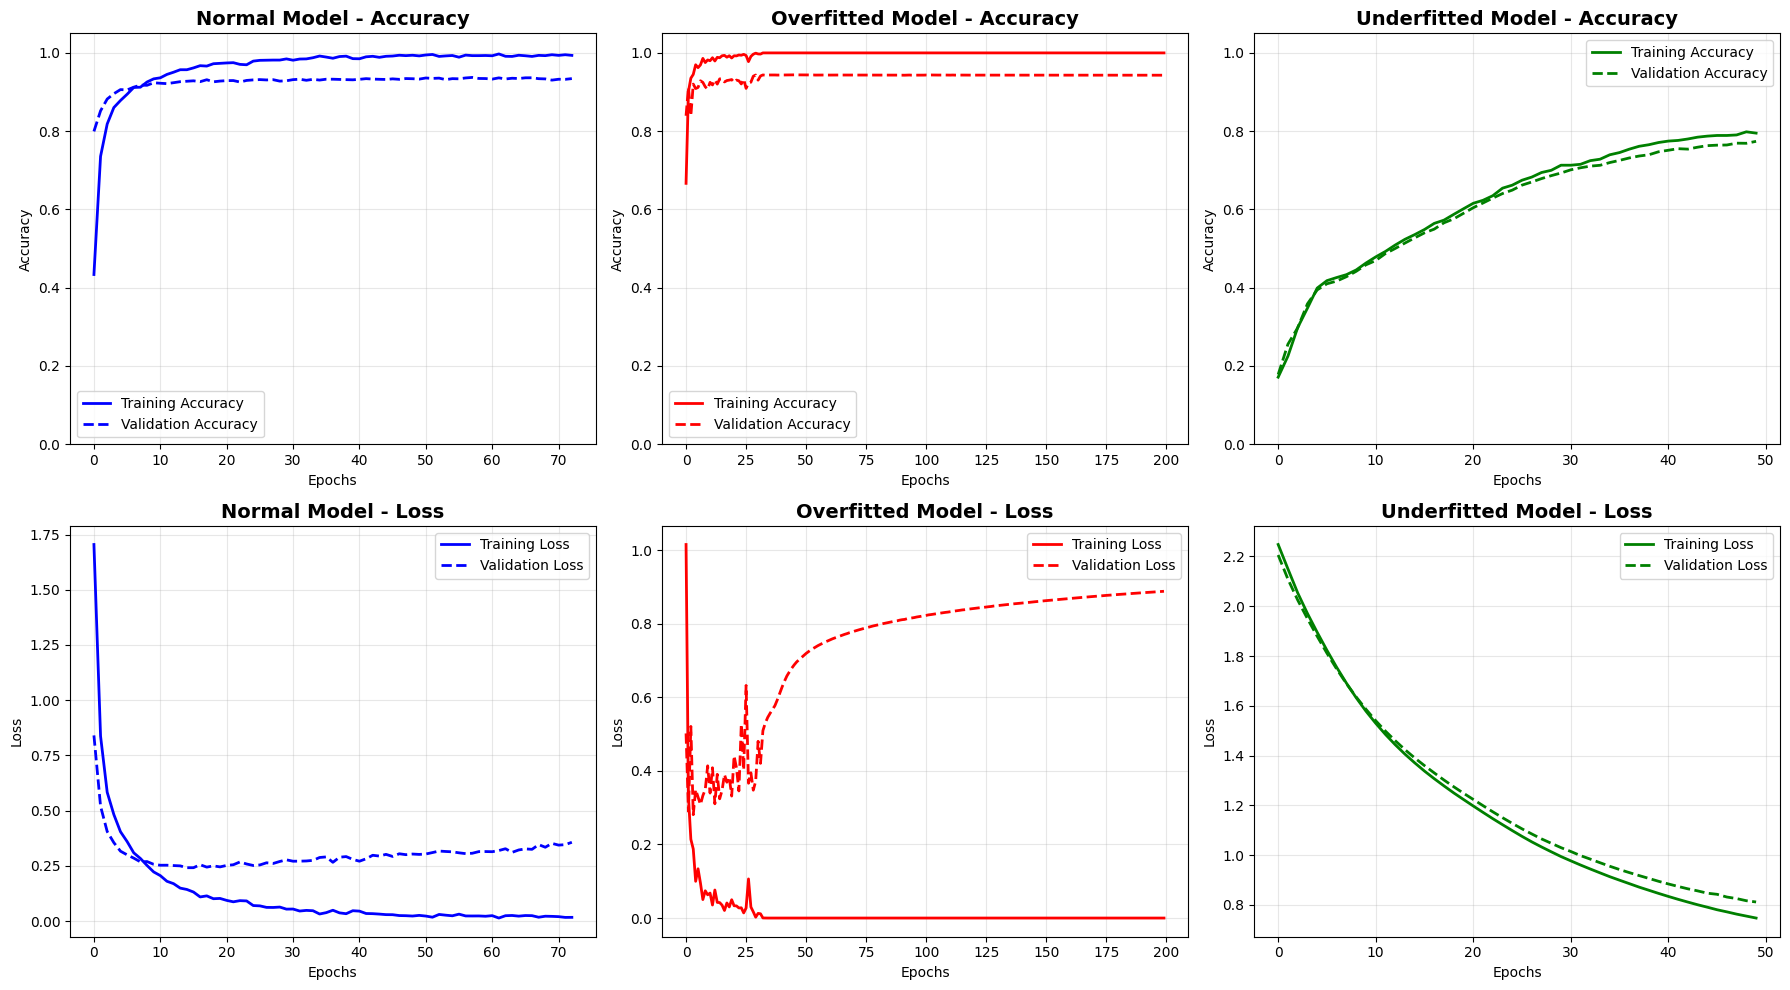

In [ ]:
# 셀 7: 학습 곡선 시각화
def plot_learning_curves(histories):
    """학습 곡선 시각화 함수"""
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    colors = ['blue', 'red', 'green']
    model_names = ['Normal', 'Overfitted', 'Underfitted']

    for i, (model_name, color) in enumerate(zip(model_names, colors)):
        history = histories[model_name]

        # 정확도 곡선
        axes[0, i].plot(history.history['accuracy'], color=color, linestyle='-',
                       linewidth=2, label='Training Accuracy')
        axes[0, i].plot(history.history['val_accuracy'], color=color, linestyle='--',
                       linewidth=2, label='Validation Accuracy')
        axes[0, i].set_title(f'{model_name} Model - Accuracy', fontsize=14, fontweight='bold')
        axes[0, i].set_xlabel('Epochs')
        axes[0, i].set_ylabel('Accuracy')
        axes[0, i].legend()
        axes[0, i].grid(True, alpha=0.3)
        axes[0, i].set_ylim(0, 1.05)

        # 손실 곡선
        axes[1, i].plot(history.history['loss'], color=color, linestyle='-',
                       linewidth=2, label='Training Loss')
        axes[1, i].plot(history.history['val_loss'], color=color, linestyle='--',
                       linewidth=2, label='Validation Loss')
        axes[1, i].set_title(f'{model_name} Model - Loss', fontsize=14, fontweight='bold')
        axes[1, i].set_xlabel('Epochs')
        axes[1, i].set_ylabel('Loss')
        axes[1, i].legend()
        axes[1, i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# 학습 곡선 그리기
plot_learning_curves(histories)

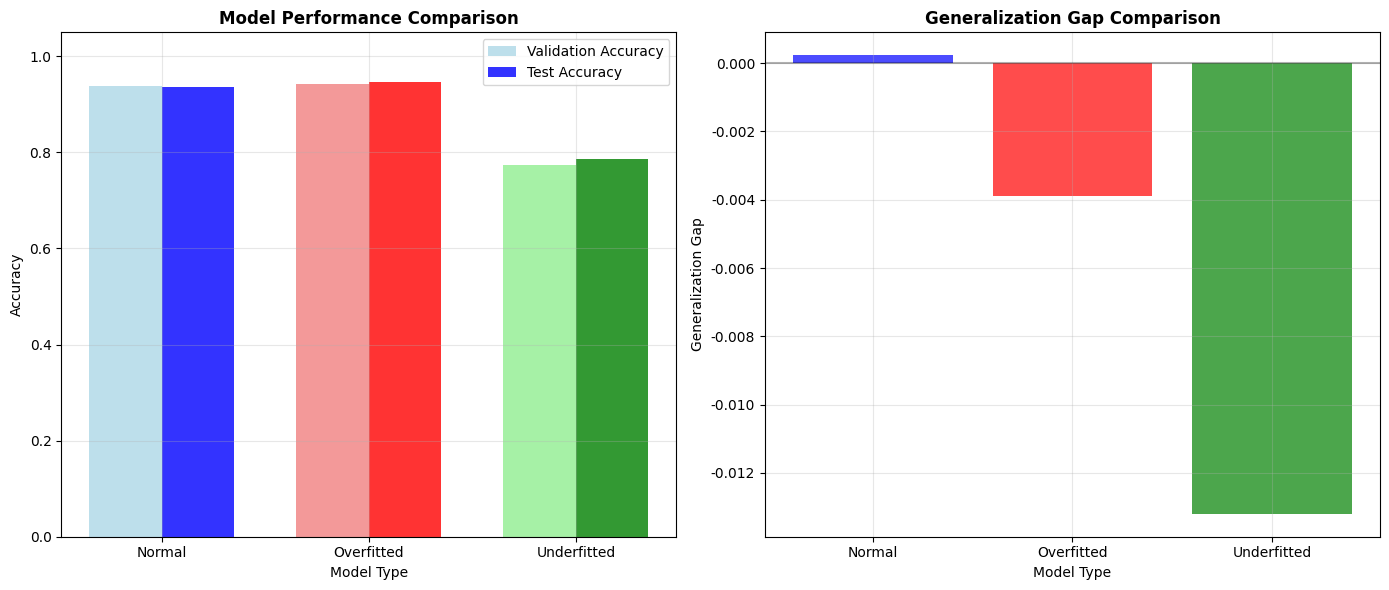

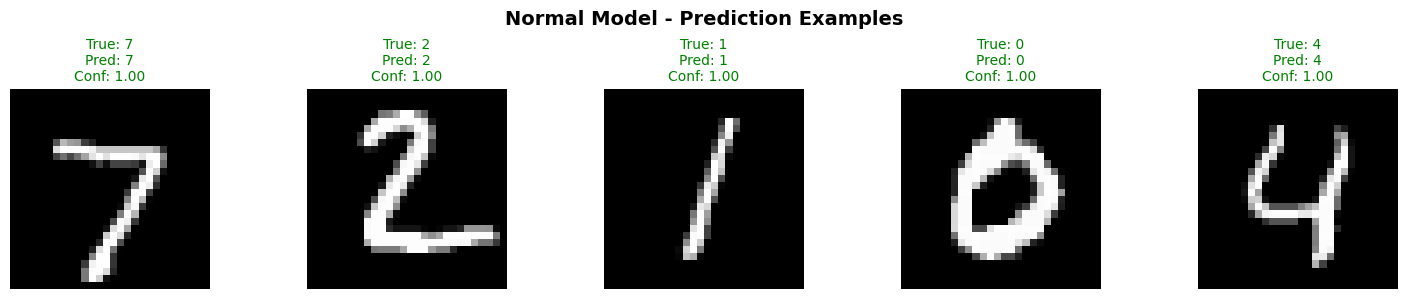

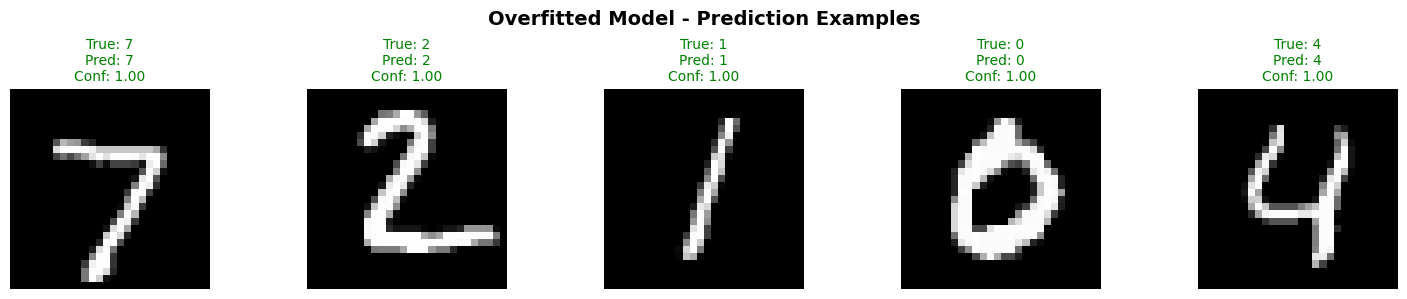

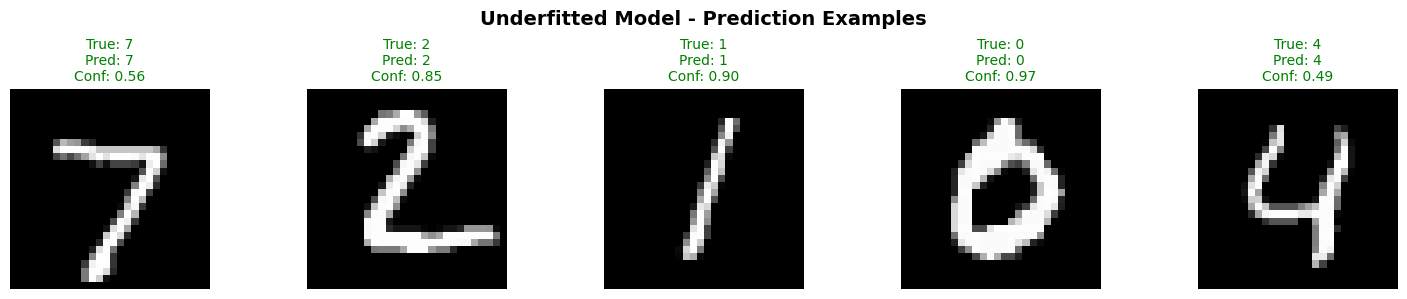

In [ ]:
# 셀 8: 비교 분석 및 예측 결과
# 모델별 성능 비교 차트
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

model_names = list(results.keys())
val_accuracies = [results[name]['val_accuracy'] for name in model_names]
test_accuracies = [results[name]['test_accuracy'] for name in model_names]

# 정확도 비교
x = np.arange(len(model_names))
width = 0.35

axes[0].bar(x - width/2, val_accuracies, width, label='Validation Accuracy',
           color=['lightblue', 'lightcoral', 'lightgreen'], alpha=0.8)
axes[0].bar(x + width/2, test_accuracies, width, label='Test Accuracy',
           color=['blue', 'red', 'green'], alpha=0.8)
axes[0].set_xlabel('Model Type')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Performance Comparison', fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels([name.replace(' Model', '') for name in model_names])
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(0, 1.05)

# 일반화 격차 (Generalization Gap)
gen_gaps = [results[name]['val_accuracy'] - results[name]['test_accuracy'] for name in model_names]
colors = ['blue', 'red', 'green']

axes[1].bar(range(len(model_names)), gen_gaps, color=colors, alpha=0.7)
axes[1].set_xlabel('Model Type')
axes[1].set_ylabel('Generalization Gap')
axes[1].set_title('Generalization Gap Comparison', fontweight='bold')
axes[1].set_xticks(range(len(model_names)))
axes[1].set_xticklabels([name.replace(' Model', '') for name in model_names])
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# 예측 샘플 시각화 함수
def show_predictions(model, model_name, num_samples=5):
    """모델의 예측 결과를 시각화하는 함수"""
    predictions = model.predict(x_test[:num_samples], verbose=0)

    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

        true_label = np.argmax(y_test[i])
        pred_label = np.argmax(predictions[i])
        confidence = np.max(predictions[i])

        color = 'green' if true_label == pred_label else 'red'
        plt.title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}',
                 color=color, fontsize=10)
        plt.axis('off')

    plt.suptitle(f'{model_name} - Prediction Examples', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# 각 모델의 예측 결과 보기
for name, model in models_eval.items():
    show_predictions(model, name)